# **Visual Question Answering with BLIP**  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vizwiz/Annotations/Annotations/train.json
/kaggle/input/vizwiz/Annotations/Annotations/test.json
/kaggle/input/vizwiz/Annotations/Annotations/val.json
/kaggle/input/vizwiz/val/val/VizWiz_val_00002755.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00000182.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00006487.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00002366.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00003735.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00003867.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00004089.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00007679.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00005929.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00007011.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00003510.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00001144.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00001240.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00003652.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_00006323.jpg
/kaggle/input/vizwiz/val/val/VizWiz_val_

In [2]:
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch
import os


2025-07-25 08:01:54.809784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753430515.081727      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753430515.167413      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the processor and model

In [3]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

# Choosing Device

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

# Function to answer a question based on an image

In [5]:
def answer_question(image_path, question):
    image = Image.open(image_path).convert('RGB')
    inputs = processor(image, question, return_tensors="pt").to(device)
    output = model.generate(**inputs)
    return processor.decode(output[0], skip_special_tokens=True)


In [6]:
train_dir = '/kaggle/input/vizwiz/train/train'
print(os.listdir(train_dir)[:5])

['VizWiz_train_00023624.jpg', 'VizWiz_train_00006610.jpg', 'VizWiz_train_00016106.jpg', 'VizWiz_train_00021342.jpg', 'VizWiz_train_00019766.jpg']


# Example of usage

In [7]:
img_path = '/kaggle/input/vizwiz/train/train/VizWiz_train_00000002.jpg'  
image = Image.open(img_path)

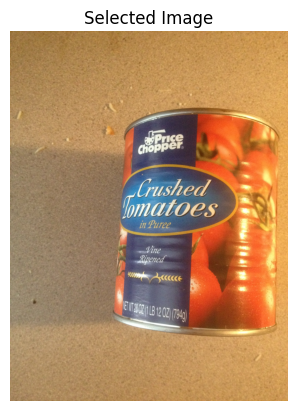

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis("off")
plt.title("Selected Image")
plt.show()

In [9]:
img_path = "/kaggle/input/vizwiz/train/train/VizWiz_train_00000002.jpg"
question = "What is in the container"

print("Answer:", answer_question(img_path, question))


Answer: tomatoes
